# 自定义类读取数据

In [11]:
import os
import torch
from PIL import Image
from 
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([
    transforms.ToTensor()
])

* 定义自己的数据集类,加载sea_ice数据集

In [12]:
# 数据增广
def AUG_F(path, i = 0):
    img = Image.open(path)
    functions = {
        0 : torchvision.transforms.RandomHorizontalFlip(),
        1 : torchvision.transforms.RandomVerticalFlip(),
        2 : torchvision.transforms.RandomResizedCrop((150, 150), scale=(0.1, 1), ratio=(0.5, 2)) ,
        3 : torchvision.transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
        }
    
    return functions[i](img)


# 读取高光谱数据和标签
class MyDataset(Dataset):
    # TensorDataset继承Dataset, 重载了__init__, __getitem__, __len__
    # 实现将一组Tensor数据对封装成Tensor数据集
    # 能够通过index得到数据集的数据，能够通过len，得到数据集大小

    def __init__(self, path):
        self.name = os.listdir(os.path.join(path, 'label'))  #得到所有文件名
        self.path = path


    def __getitem__(self, index):
        segment_name = self.name[index]
        image_path = os.path.join(self.path, 'image', segment_name)
        label_path = os.path.join(self.path, 'label', segment_name)
        
        image  = AUG_F(image_path)
        segment_image = AUG_F(label_path,1)
        return transform(image), transform(segment_image)

    def __len__(self):
        return len(self.name)    # size(0) 返回当前张量维数的第一维

 #划分数据集   
def train_test_dataset(full_dataset, p):
    assert p > 0 and p < 1  
    train_size = int(p * len(full_dataset))
    test_size = len(full_dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
    return train_dataset, test_dataset
    


* 训练模型

In [13]:
data_path =r'./sea_ice'
img_data = MyDataset(data_path)

train_dataset, _ = train_test_dataset(img_data, 0.8)

trainloader = DataLoader(train_dataset, batch_size=4,shuffle=True)

for epoch in range(5):
    for step, (img, label) in enumerate(trainloader):
        pass
        # 训练模型
        print('Epoch: ', epoch, '| Step: ', step)
    


Epoch:  0 | Step:  0
Epoch:  0 | Step:  1
Epoch:  0 | Step:  2
Epoch:  0 | Step:  3
Epoch:  0 | Step:  4
Epoch:  0 | Step:  5
Epoch:  0 | Step:  6
Epoch:  0 | Step:  7
Epoch:  0 | Step:  8
Epoch:  0 | Step:  9
Epoch:  0 | Step:  10
Epoch:  0 | Step:  11
Epoch:  0 | Step:  12
Epoch:  0 | Step:  13
Epoch:  0 | Step:  14
Epoch:  0 | Step:  15
Epoch:  0 | Step:  16
Epoch:  0 | Step:  17
Epoch:  0 | Step:  18
Epoch:  0 | Step:  19
Epoch:  0 | Step:  20
Epoch:  0 | Step:  21
Epoch:  0 | Step:  22
Epoch:  0 | Step:  23
Epoch:  0 | Step:  24
Epoch:  0 | Step:  25
Epoch:  0 | Step:  26
Epoch:  0 | Step:  27
Epoch:  0 | Step:  28
Epoch:  0 | Step:  29
Epoch:  0 | Step:  30
Epoch:  0 | Step:  31
Epoch:  0 | Step:  32
Epoch:  0 | Step:  33
Epoch:  0 | Step:  34
Epoch:  0 | Step:  35
Epoch:  0 | Step:  36
Epoch:  0 | Step:  37
Epoch:  0 | Step:  38
Epoch:  0 | Step:  39
Epoch:  1 | Step:  0
Epoch:  1 | Step:  1
Epoch:  1 | Step:  2
Epoch:  1 | Step:  3
Epoch:  1 | Step:  4
Epoch:  1 | Step:  5
Epoc

* 显示读取结果

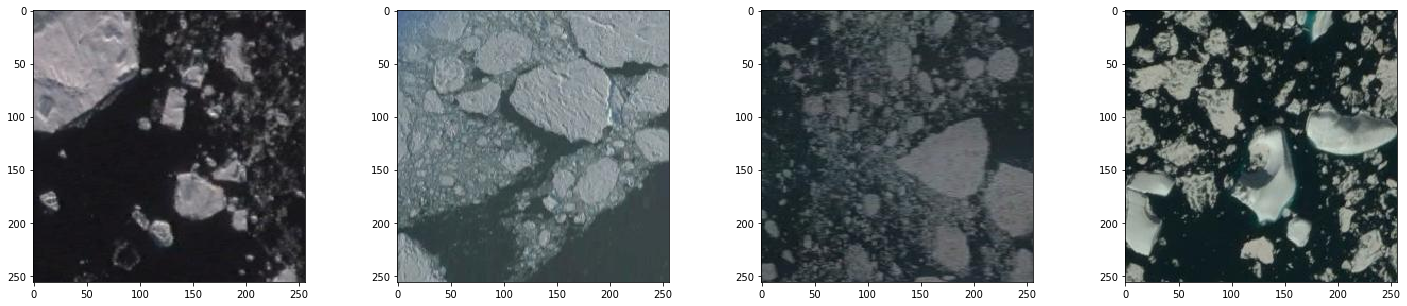

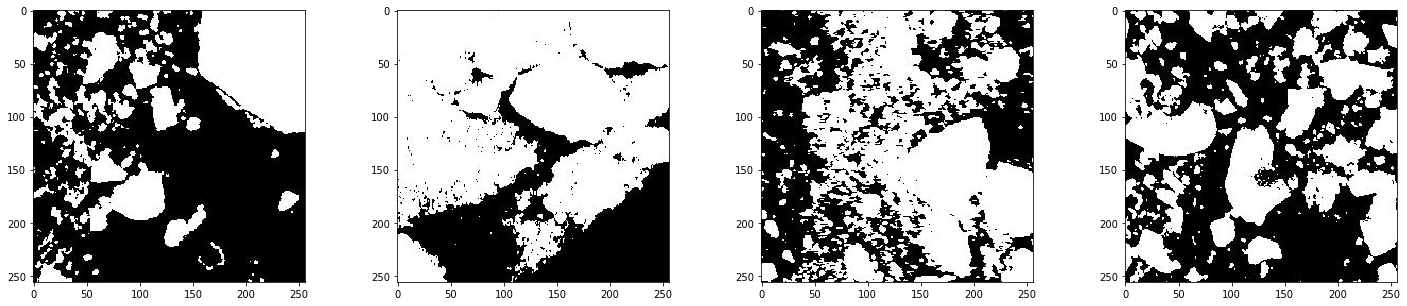

In [14]:
fig=plt.figure(figsize=(25,5))

for i in range(4):
    data,_ = img_data[i]
    plt.subplot(1,4,i+1)
    plt.imshow(Image.fromarray(np.uint8((data.permute(1,2,0))*255)))
plt.show()

fig=plt.figure(figsize=(25,5))
for i in range(4):
    plt.subplot(1,4,i+1)
    _,label = img_data[i]
    plt.imshow((label.squeeze()),cmap="gray")
plt.show()